# 1. Численная интерполяция

In [10]:
!pip install numpy matplotlib sympy

import numpy as np
import matplotlib.pyplot as plt

In [11]:
h = 0.5 # интерполяционный шаг
a = 0 
b = 10

def f(x: np.ndarray) -> np.ndarray:
    return np.sin(np.exp(x / 3) / 10)

In [12]:
def new_mid_arr(array: np.ndarray) -> np.ndarray:
    return (array[:-1] + array[1:]) / 2

def chebyshev_series(a: int | float, b: int | float, num_terms: int) -> np.ndarray:
    nodes = -np.cos((2 * np.arange(num_terms, dtype=np.float128) + 1) / (2 * num_terms) * np.pi)
    return (b - a) / 2 * nodes + (a + b) / 2

def equal_series(a: int | float, b: int | float, h: int | float) -> np.ndarray:
    return np.arange(a, b + h, h, dtype=np.float128)

In [13]:
class Lagrange_polynomial():
    def __init__(self, x: np.ndarray, y: np.ndarray):
        if len(x) != len(y):
            raise Exception

        self.x = x
        self.y = y
        self.n = len(x)
    
    def solve_element(self, z: int | float) -> float:
        l_z = np.zeros(self.n, dtype=np.float128)
        for j in range(0, self.n):
            l_z[j] = (np.prod((z - np.delete(self.x, j)) / (self.x[j] - np.delete(self.x, j))))

        return sum(self.y * l_z)
    
    def solve_interpolation(self, array: np.ndarray) -> np.ndarray:
        res = np.zeros(len(array), dtype=np.float128)
        for i in range(0, len(array)):
            res[i] = self.solve_element(array[i])
        
        return  res

In [14]:
a_interval = equal_series(a, b, h)
a_interval0 = new_mid_arr(a_interval)

a_poly = Lagrange_polynomial(a_interval, f(a_interval))

a_solution = a_poly.solve_interpolation(a_interval0)

In [15]:
b_interval = chebyshev_series(a, b, int((b - a) / h) + 1)
b_interval0 = new_mid_arr(b_interval)

b_poly = Lagrange_polynomial(b_interval, f(b_interval))

b_solution = b_poly.solve_interpolation(b_interval0)

Text(0.5, 1.0, 'Chebyshev series error')

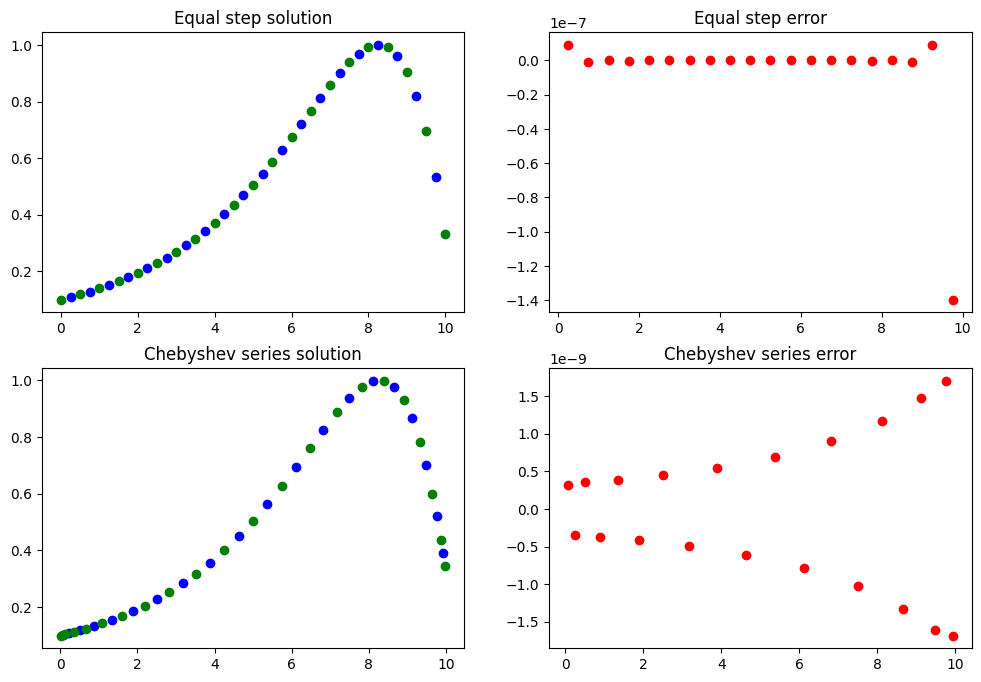

In [16]:
figure, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].scatter(a_interval0, a_solution, c="blue")
axes[0, 0].scatter(a_interval, f(a_interval), c="green")
axes[0, 0].set_title("Equal step solution")

axes[0, 1].scatter(a_interval0, f(a_interval0) - a_solution, c="red")
axes[0, 1].set_title("Equal step error")

axes[1, 0].scatter(b_interval0, b_solution, c="blue")
axes[1, 0].scatter(b_interval, f(b_interval), c="green")
axes[1, 0].set_title("Chebyshev series solution")

axes[1, 1].scatter(b_interval0, f(b_interval0) - b_solution, c="red")
axes[1, 1].set_title("Chebyshev series error")

## Задача 1

100%|██████████| 110/110 [00:06<00:00, 16.92it/s]


Text(0.5, 1.0, 'Chebyshev series max error')

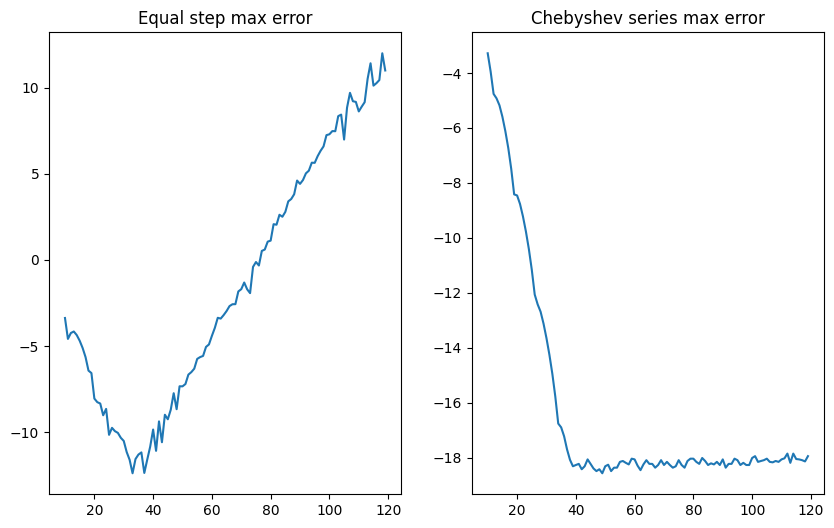

In [17]:
from tqdm import tqdm
N = 120
n_history = []
a_err_history = []
b_err_history = []

for n in tqdm(range(10, N)):
    a_interval_n = equal_series(a, b, (b - a) / n)
    a_interval0_n = new_mid_arr(a_interval_n)

    a_poly_n = Lagrange_polynomial(a_interval_n, f(a_interval_n))

    a_solution_n = a_poly_n.solve_interpolation(a_interval0_n)

    b_interval_n = chebyshev_series(a, b, n)
    b_interval0_n = new_mid_arr(b_interval_n)

    b_poly_n = Lagrange_polynomial(b_interval_n, f(b_interval_n))

    b_solution_n = b_poly_n.solve_interpolation(b_interval0_n)

    n_history.append(n)
    a_err_history.append(max(f(a_interval0_n) - a_solution_n))
    b_err_history.append(max(f(b_interval0_n) - b_solution_n))

figure, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].plot(n_history, np.log10(a_err_history))
axes[0].set_title("Equal step max error")

axes[1].plot(n_history, np.log10(b_err_history))
axes[1].set_title("Chebyshev series max error")

## Задача 2 (не выполнена)

100%|██████████| 4/4 [00:00<00:00, 32.45it/s]


IndexError: list index out of range

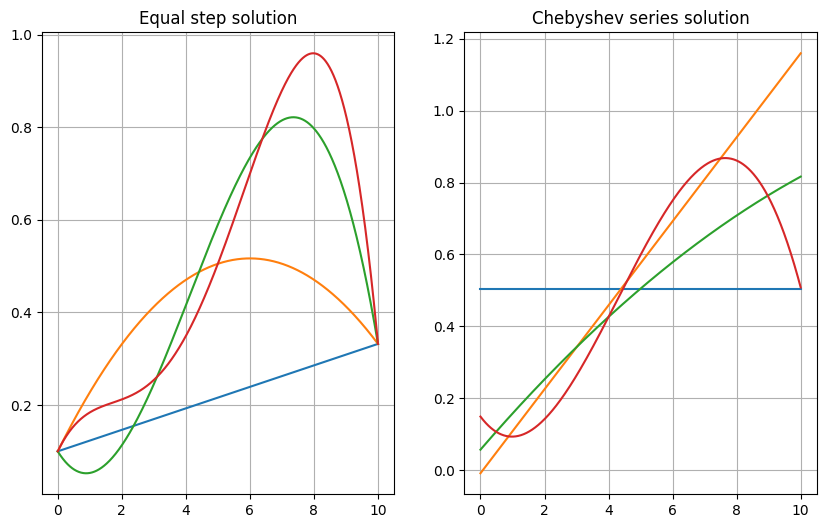

In [18]:
from tqdm import tqdm
N = 5
a_int_history = []
b_int_history = []
a_sol_history = []
b_sol_history = []

for n in tqdm(range(1, N)):
    a_interval_n = equal_series(a, b, (b - a) / n)
    a_interval0_n = equal_series(a, b, 0.01)

    a_poly_n = Lagrange_polynomial(a_interval_n, f(a_interval_n))

    a_solution_n = a_poly_n.solve_interpolation(a_interval0_n)

    b_interval_n = chebyshev_series(a, b, n)
    b_interval0_n = chebyshev_series(a, b, 1000)

    b_poly_n = Lagrange_polynomial(b_interval_n, f(b_interval_n))

    b_solution_n = b_poly_n.solve_interpolation(b_interval0_n)

    a_int_history.append(a_interval0_n)
    b_int_history.append(b_interval0_n)
    a_sol_history.append(a_solution_n)
    b_sol_history.append(b_solution_n)

figure, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].set_title("Equal step solution")
axes[1].set_title("Chebyshev series solution")
axes[0].grid(True)
axes[1].grid(True)

for n in range(N):
    axes[0].plot(a_int_history[n], a_sol_history[n])
    axes[1].plot(b_int_history[n], b_sol_history[n])
